# EDA & VISUALIZATION

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset

In [2]:
df = pd.read_csv("housing (1).csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.shape

(20640, 10)

## Univariate Analysis — Histograms (Distributions)

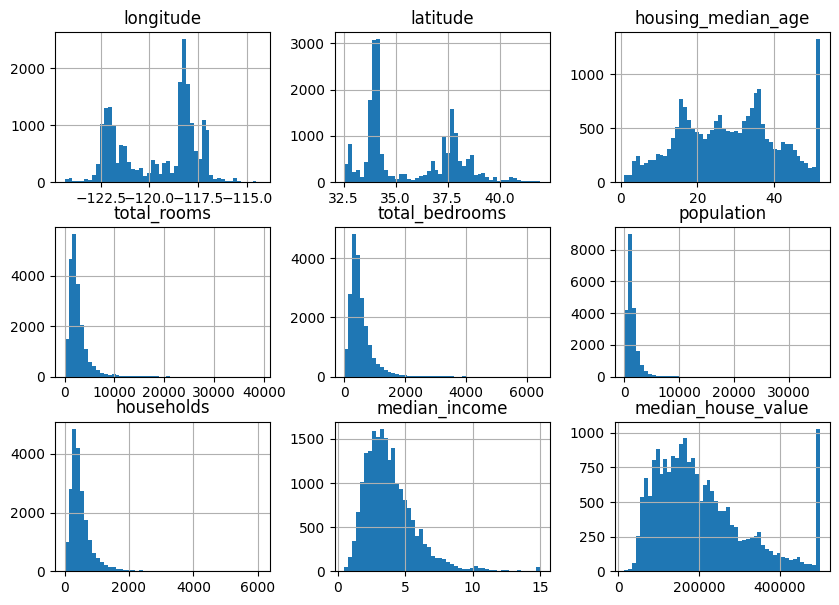

In [6]:
df.hist(bins=50, figsize=(10, 7))
plt.show()

* What you must mentally note
* Which features are heavily right-skewed?
* Any feature with a giant spike at one value?
* Any feature looking almost constant?

## Target Variable Analysis

In [7]:
# Step 1: Identify target
target = "median_house_value"

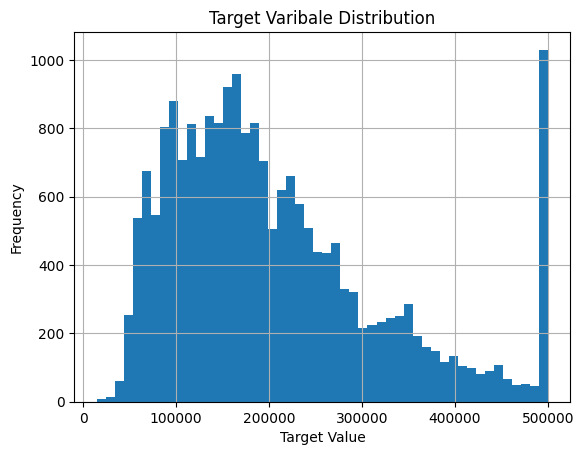

In [8]:
# Step 2 : Target distribution
df[target].hist(bins=50)
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.title("Target Varibale Distribution");

In [9]:
# Step 3 : Basic Statistics
df[target].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

* What you are checking
    1. Is it skewed?
    2. Extreme max/min?
    3. Clipped values (artificial ceiling)?

* This directly affects: 
 1. metric choice
 2. transformations later

## Feature ↔ Target Relationships (Signal Discovery)

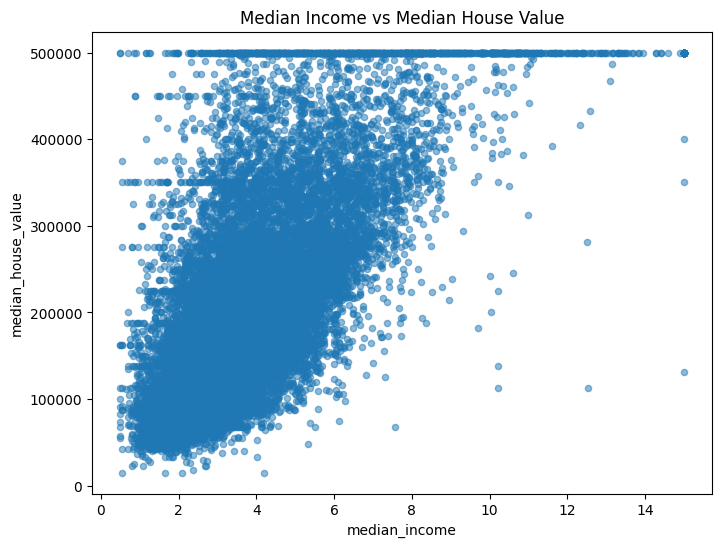

In [10]:
# Median Income vs Median House Value
df.plot(
    kind = 'scatter',
    x = 'median_income',
    y = target,
    alpha=0.5,
    figsize=(8, 6),
    title = "Median Income vs Median House Value"
);


* WHY this matters

    1.Reveals linear vs non-linear patterns

   2.Detects saturation effects

    3.Shows noise vs signal

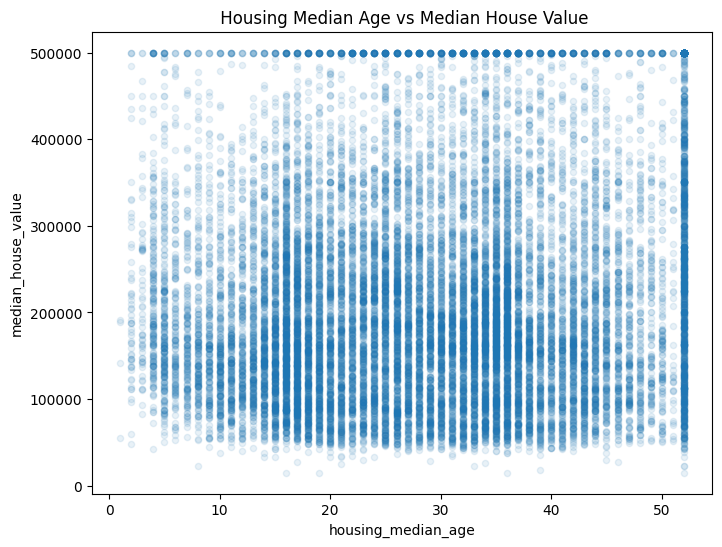

In [11]:
# Housing Median Age vs Median House Value

df.plot(
    kind = 'scatter',
    x ='housing_median_age',
    y = target,
    alpha = 0.1,
    figsize=(8,6),
    title = " Housing Median Age vs Median House Value"

);

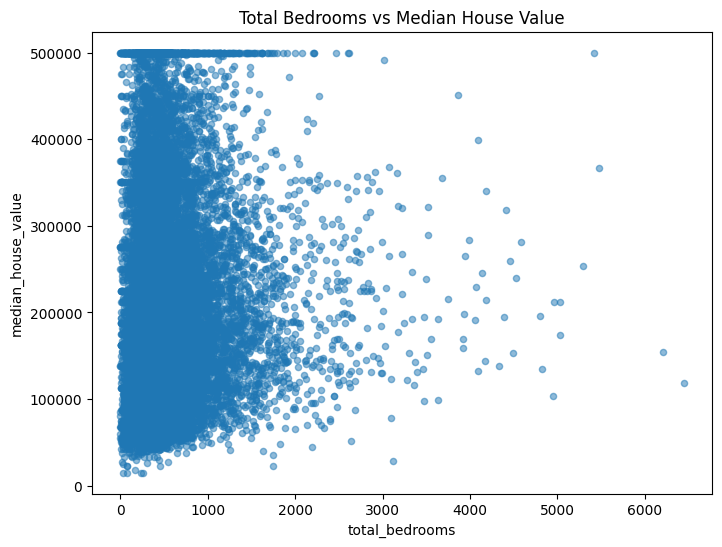

In [12]:
# Total Bedrooms vs Median House Value
df.plot(
    kind='scatter',
    x = 'total_bedrooms',
    y=target ,
    alpha = 0.5,
    figsize=(8,6),
    title='Total Bedrooms vs Median House Value'
);

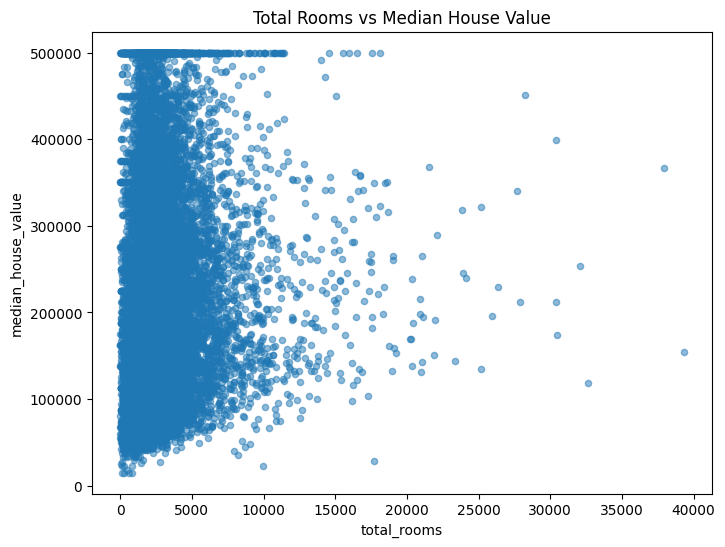

In [13]:
# Total Rooms vs Median House Value
df.plot(
    kind = 'scatter',
    x = 'total_rooms',
    y=target,
    alpha=0.5,
    figsize=(8,6),
    title = "Total Rooms vs Median House Value"
);

## Feature ↔ Feature Relationships (Correlation)

In [14]:
# Step 1: Correlation matrix
corr_matrix = df.corr(numeric_only = True)

In [15]:
# Step 2: Inspect strongest correlations with target
corr_matrix[target].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

###  What you’re looking for

1.Features strongly correlated with target

2.Features suspiciously too correlated (possible leakage)

3.Groups of highly correlated features

## Correlation Visualization

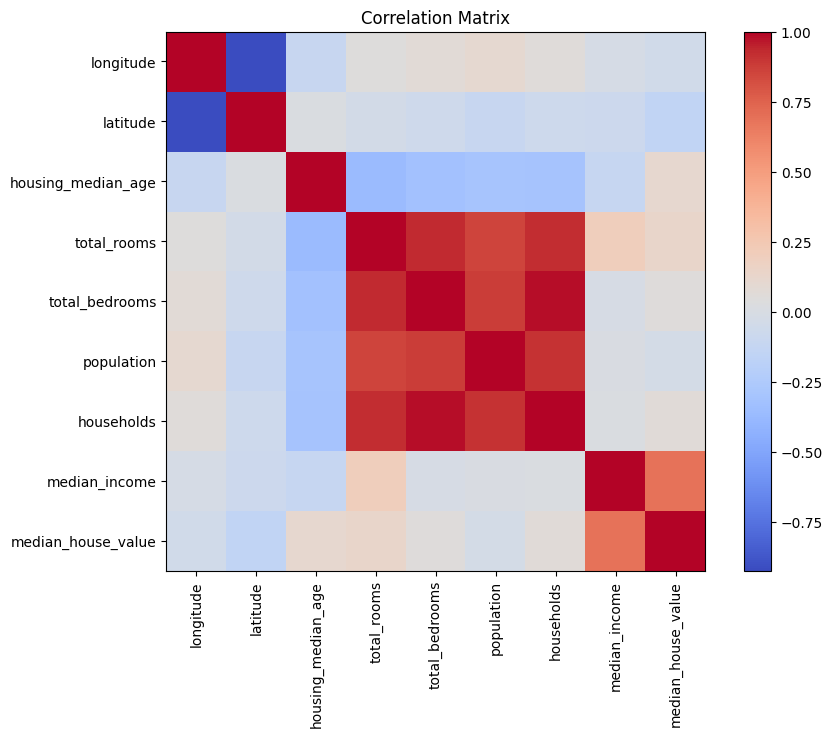

In [16]:
plt.figure(figsize=(10,7))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix")
plt.show();

### Why this helps

1. Visual multicollinearity detection

2. Feature redundancy awareness

## Domain-Specific Visualization

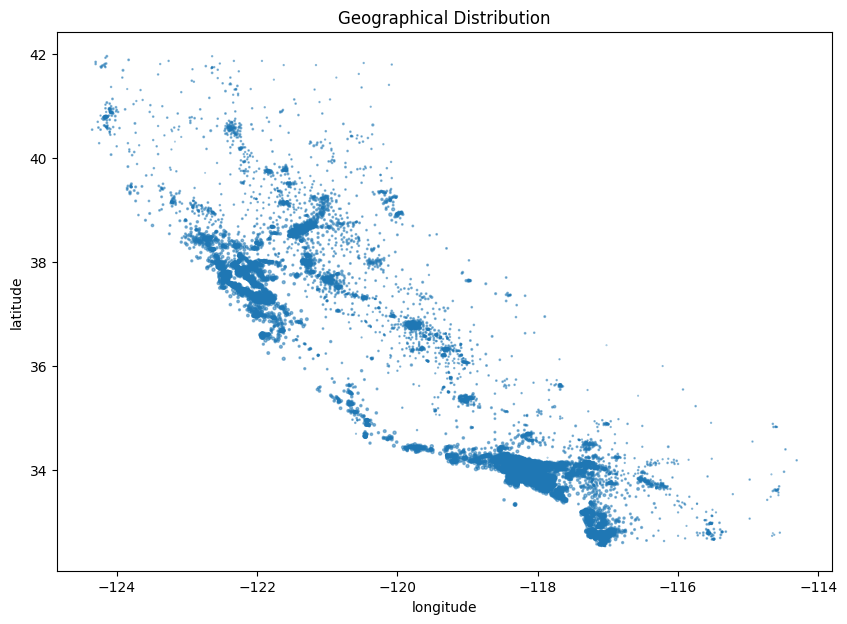

In [17]:
df.plot(
    kind = 'scatter',
    x='longitude',
    y = 'latitude',
    alpha = 0.5,
    s = df[target]/100000,
    figsize=(10,7)
)
plt.title("Geographical Distribution")
plt.show()

### What this reveals

1. Spatial clusters

2. Location-based price effects

3. Hidden patterns correlations miss

## Correlation Matrix with Values

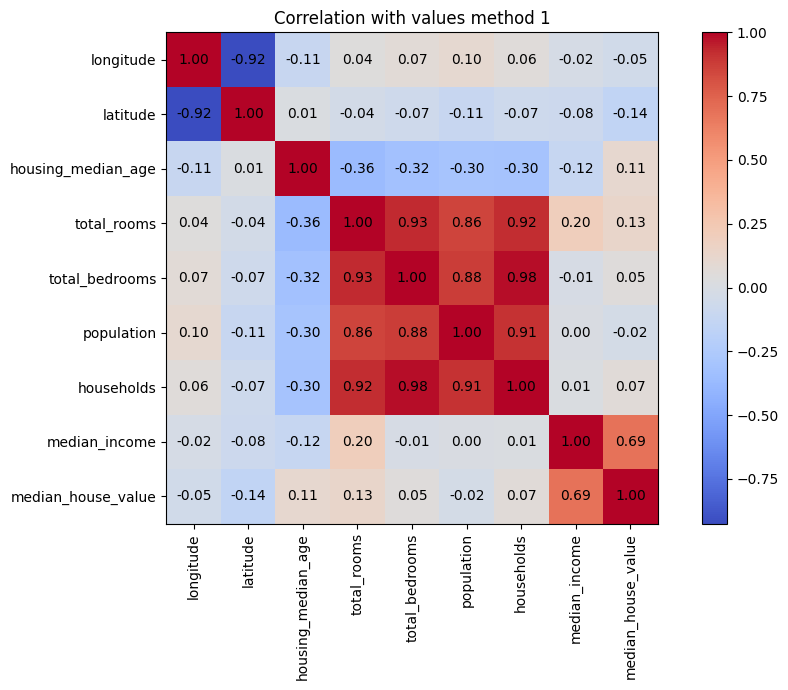

In [18]:
# Method 1 
corr_mat = df.corr(numeric_only = True)

plt.figure(figsize=(10,7))
plt.imshow(corr_mat, cmap='coolwarm')
plt.colorbar()

# Axis Labels
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation =90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)

# Annotate values
for i in range(len(corr_mat.columns)):
    for j in range(len(corr_mat.columns)):
        value= corr_mat.iloc[i,j]
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black')

plt.title("Correlation with values method 1")
plt.tight_layout();

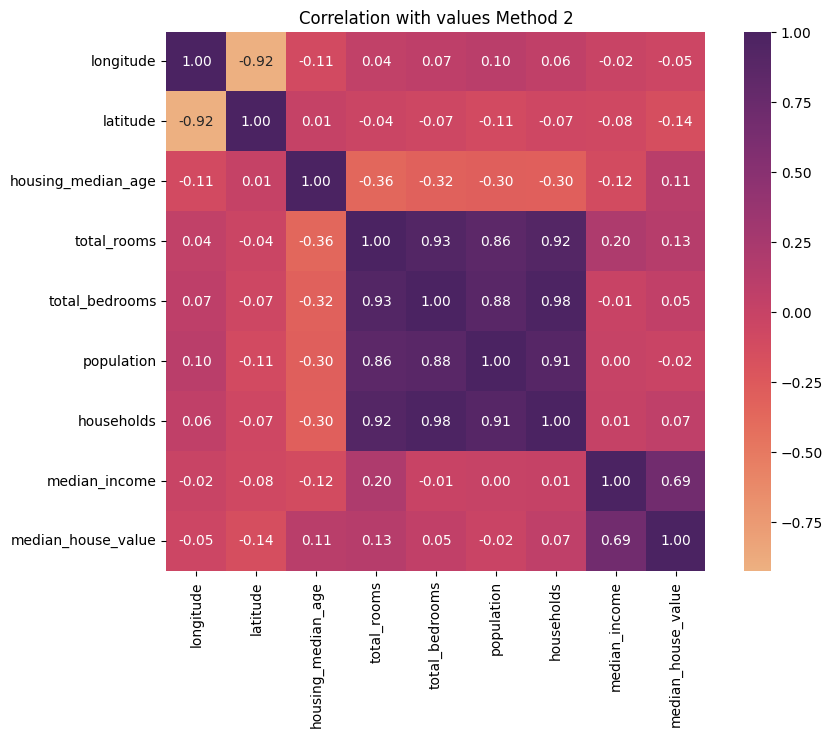

In [35]:
# Method 2 using Seaborn

import seaborn as sns

corr_mat = df.corr(numeric_only=True)
plt.figure(figsize=(10,7))
sns.heatmap(
    corr_mat,
    annot =True,
    fmt= ".2f",
    cmap= 'flare',
    square = True
)
plt.title("Correlation with values Method 2");

In [36]:
np.random.choice(plt.colormaps)

'Greys_r'